###Mutual information and multi-variable MI

In [ ]:
'''
Python pipeline computes connectivity via pairwise mutual information (MI) and multi-variable MI (total correlation)
on LFP epochs (epochs × channels × samples) using infomeasure. For pairwise coupling, it applies the ordinal estimator
(embedding_dim=4–5, base=2) on each epoch’s (samples×channels) data; for 8-way multivariate dependence it uses the
KSG k-NN estimator. Results are in bits, and optional offset sweeps probe lagged interactions. Outputs include per-epoch
MI matrices and multivariate MI trajectories.

Article: https://www.nature.com/articles/s41598-025-14053-5
'''

####Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install infomeasure
import infomeasure as im
from sklearn.preprocessing import KBinsDiscretizer

####Functions

#####Function to calculate the MI using infomeasure

In [ ]:
def compute_MI(data, embedding_dim=4):
  '''
  Compute the MI matrices for all the pairs of channel in data using infomeasure
  package and the Ordinal Estimator, ,
  '''
  data = np.asarray(data) #convert to np array if not already
  n_samples, n_channels = data.shape #assing depending on size

  mi_matrix = np.zeros((n_channels, n_channels)) #initialized MI matrix

  for i in range(n_channels):
    for j in range(i+1, n_channels):
      x = data[:,i]
      y = data[:,j]

      mi_value = im.mutual_information(x, y, approach='ordinal', embedding_dim=embedding_dim, base=2)

      mi_matrix[i,j] = mi_matrix[j,i] = mi_value
  return mi_matrix

#####Function to calculate the Multi-variable mutual information

In [ ]:
def compute_multivariableMI(data, k=4):
  '''
  Compute the multi-variable mutual information, using the Kraskov-Stoegbauer-Grassberger (KSG)
  estimation, k = number of nearest neighbors
  '''
  data = np.asarray(data) #convert to np array if not already
  n_samples, n_channels = data.shape #assing depending on size

  # Calculate multivariable mutual information for all the channels
  multi_mi = im.mutual_information(*[data[:, i] for i in range(n_channels)], approach='metric', k=k, base=2)

  return multi_mi

####Load the data

In [ ]:
data = np.load('A338_PS1_clean_epochs.npy')
print(f"Data load, shape: {data.shape} (epoch, channels, samples)")

Data load, shape: (107, 8, 15000) (epoch, channels, samples)


####Main loop to analyze the epochs

In [ ]:
MI_matrices = []
Multi_MI = []

for i, epoch_data in enumerate(data):
  segment_for_analysis = epoch_data.T
  mi_mat = compute_MI(segment_for_analysis, embedding_dim=4)
  mmi_val = compute_multivariableMI(segment_for_analysis, k=4)

  MI_matrices.append(mi_mat)
  Multi_MI.append(mmi_val)

print('Finish')


Finish


####Visualization

#####MI matrices per epoch

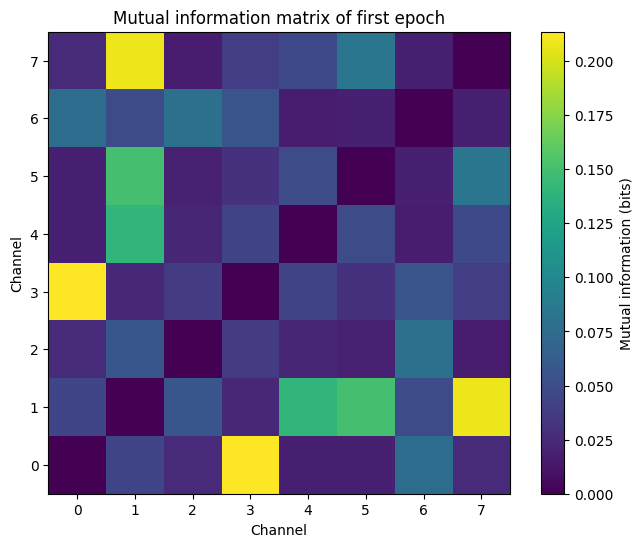

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(MI_matrices[0], origin='lower', cmap='viridis')
plt.colorbar(label="Mutual information (bits)")
plt.title(f"Mutual information matrix of first epoch")
plt.xlabel("Channel")
plt.ylabel("Channel")
plt.show()

#####Multi-variable MI

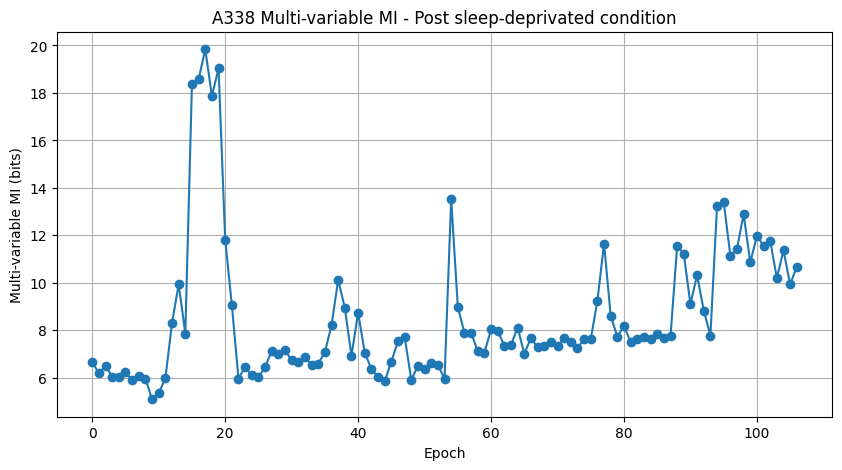

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(Multi_MI)), Multi_MI, marker='o', linestyle='-')
plt.title("A338 Multi-variable MI - Post sleep-deprivated condition")
plt.xlabel("Epoch")
plt.ylabel("Multi-variable MI (bits)")
plt.grid(True)
plt.show()

####Save the files

In [ ]:
np.save('A338_PS1_MI.npy', MI_matrices)
np.save('A338_PS1_Multi_MI.npy', Multi_MI)